# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


Współczynniki wielomianu w1 to: [-6. 11. -6.  1.]


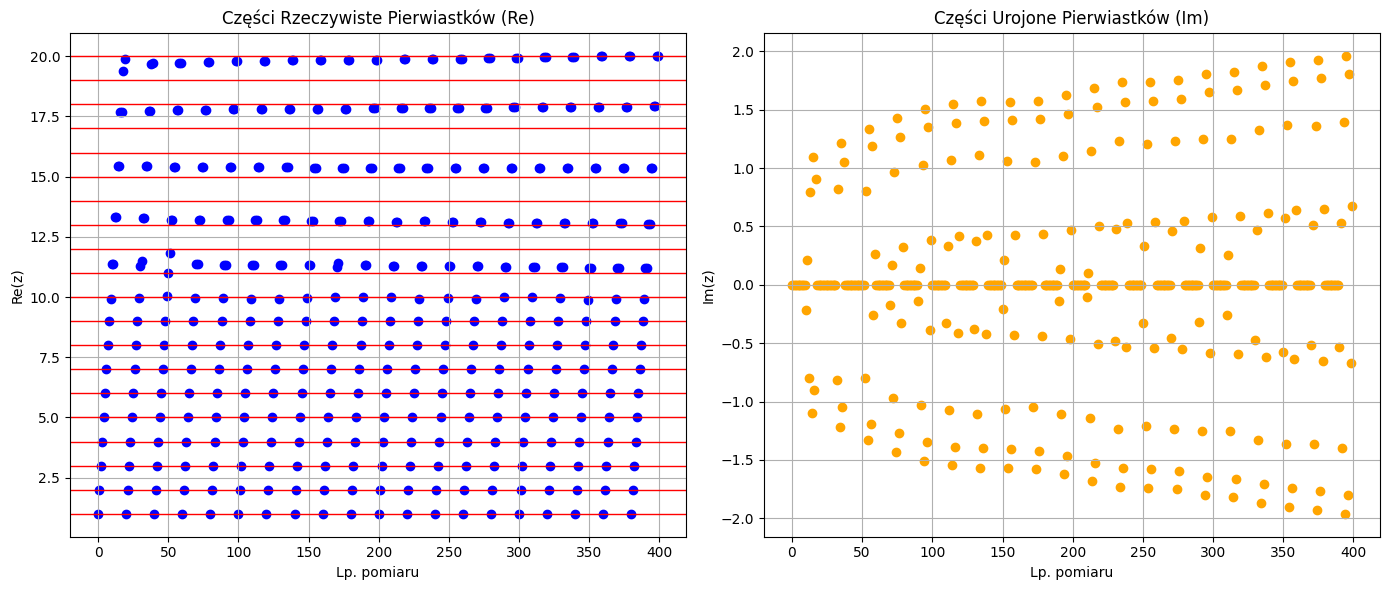

In [3]:
# ===== Twoja implementacja tutaj =====
from main import roots_20
wsp = nppoly.polyfromroots([1,2,3])
print(f'Współczynniki wielomianu w1 to: {wsp}')
#Punkt 2
idealne_pierwiastki = np.arange(1, 21)
wspolczynniki_w2 = nppoly.polyfromroots(idealne_pierwiastki)

roots_re = []
roots_im = [] 

aktualne_wsp = wspolczynniki_w2.copy()

for i in range(20):
    wynik = roots_20(aktualne_wsp)
    
    nowe_wsp, pierwiastki = wynik
    
    aktualne_wsp = nowe_wsp
    
    roots_re.extend(pierwiastki.real)
    roots_im.extend(pierwiastki.imag)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(range(len(roots_re)), roots_re, color='blue')
ax1.set_title("Części Rzeczywiste Pierwiastków (Re)")
ax1.set_ylabel("Re(z)")
ax1.set_xlabel("Lp. pomiaru")
ax1.grid(True)

for root in idealne_pierwiastki:
    ax1.axhline(root, color='red', linewidth=1)

ax2.scatter(range(len(roots_im)), roots_im, color='orange')
ax2.set_title("Części Urojone Pierwiastków (Im)")
ax2.set_ylabel("Im(z)")
ax2.set_xlabel("Lp. pomiaru")
ax2.grid(True)

plt.tight_layout()
plt.show()

Przeprowadzona symulacja wykazała, że badany wielomian (tzw. wielomian Wilkinsona) charakteryzuje się skrajnie złym uwarunkowaniem numerycznym. Z wykresów wynika, że najbardziej wrażliwe na zaburzenia są pierwiastki w środkowej części przedziału (szczególnie w zakresie $n \in [10, 17]$), które drastycznie odchylają się od wartości teoretycznych. Dla tych punktów obserwujemy również pojawienie się znaczących części urojonych, co oznacza, że na skutek niewielkich zmian współczynników pierwiastki rzeczywiste przekształcają się w pary liczb zespolonych. W przeciwieństwie do nich, pierwiastki na krańcach przedziału (bliskie 1 oraz 20) pozostają stabilne i pokrywają się z liniami referencyjnymi. Eksperyment potwierdza, że dla wielomianów wysokiego stopnia nawet minimalne błędy reprezentacji lub szumy mogą prowadzić do całkowicie błędnych wyników w obszarze największej gęstości pierwiastków. Jako miarę wrażliwości każdego z pierwiastków $x_k$ na zaburzenia współczynników wielomianu $W(x) = \sum_{i=0}^n a_i x^i$ proponuję zastosować wskaźnik uwarunkowania zadania obliczania miejsc zerowych. Wskaźnik ten, oznaczany jako $cond(x_k)$

---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

Macierz frobeniusa dla wielomianu (x-1)^8 to:
[[  0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.]
 [ -1.   8. -28.  56. -70.  56. -28.   8.]]
Wartości własne macierzy Frobeniusa to:
[1.01904738+0.00796691j 1.01904738-0.00796691j 1.00770347+0.01904716j
 1.00770347-0.01904716j 0.99203361+0.01878426j 0.99203361-0.01878426j
 0.98121553+0.00770398j 0.98121553-0.00770398j]
Postać Schura macierzy Frobeniusa to:
[[ 1.01798620e+00 -4.43722411e-01  2.70223683e-01  9.23108070e-01
   1.43763057e+00  3.54593543e+00  9.97914626e+00  4.12474910e+01]
 [ 0.00000000e+00  1.01272357e+00 -1.01218994e+00 -8.27677960e-01
  -2.40178497e+00 -4.93649158e+00 -1.44569499e+01 -5.94408141e+01]
 [ 0.00000000e+00  1.59751087e-04  1.01272357e+00  1.60516788e+00
   1.857354

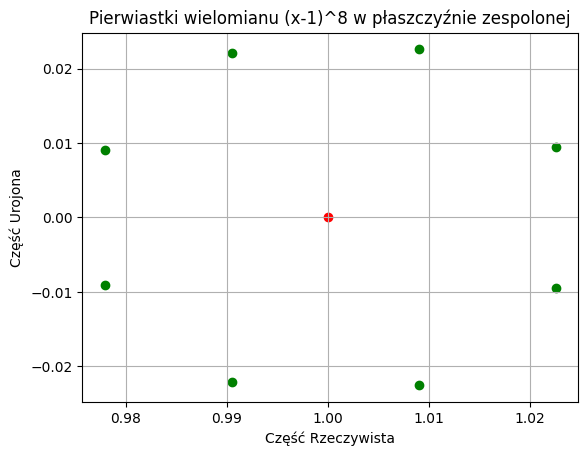

In [4]:
# ===== Twoja implementacja tutaj =====
from main import frob_a
wsp = nppoly.polyfromroots([1,1,1,1,1,1,1,1])
frobenius = frob_a(wsp)
print(f'Macierz frobeniusa dla wielomianu (x-1)^8 to:\n{frobenius}')
wlas_val = np.linalg.eigvals(frobenius)
print(f'Wartości własne macierzy Frobeniusa to:\n{wlas_val}')
shur = sp.linalg.schur(frobenius)
print(f'Postać Schura macierzy Frobeniusa to:\n{shur[0]}')
pierwiastki = nppoly.polyroots(wsp)
print(f'Pierwiastki wielomianu to:\n{pierwiastki}')

plt.scatter(pierwiastki.real, pierwiastki.imag, color='green')
plt.scatter(1, 0, color='red')
plt.title("Pierwiastki wielomianu (x-1)^8 w płaszczyźnie zespolonej")
plt.xlabel("Część Rzeczywista")
plt.ylabel("Część Urojona")
plt.grid()

Wykres przedstawia problem złego uwarunkowania pierwiastków wielokrotnych. Analitycznie wielomian $(x-1)^8$ posiada tylko jeden pierwiastek $x=1$ o krotności 8. Jednak wyniki numeryczne nie pokrywają się z wartością idealną, lecz tworzą regularny okrąg wokół niej. Zjawisko to wynika z faktu, że dla pierwiastka o krotności $m=8$, błędy zaokrągleń rzędu precyzji maszynowej ($\varepsilon \approx 10^{-16}$) przekładają się na błąd wyniku rzędu $\sqrt[8]{\varepsilon} = 10^{-2}$. Dlatego zamiast jednego punktu w $(1,0)$, otrzymujemy zbiór 8 rozseparowanych pierwiastków zespolonych, co dowodzi, że pierwiastki wielokrotne są niezwykle wrażliwe na numeryczne błędy reprezentacji liczb.

---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

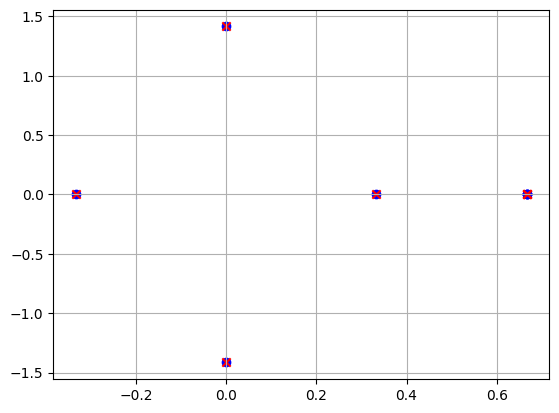

In [5]:
# ===== Twoja implementacja tutaj =====
roots = nppoly.polyroots([16,-72,-28,558,-990,783,-486,243])
analityczne = [1/3, -1/3, 2/3, 2/3, 2/3, 1j*np.sqrt(2), -1j*np.sqrt(2)]
plt.scatter([r.real for r in analityczne], [r.imag for r in analityczne], color='blue')
plt.scatter(roots.real, roots.imag, color='red', marker='x')
plt.grid()

W przeciwieństwie do Zadania 2, gdzie pierwiastek o krotności 8 uległ rozmyciu, w zadaniu 3 wyniki numeryczne idealnie pokrywają się z wynikami analitycznymi. Wynika to z faktu, że wielomian $w_4(x)$ jest lepiej uwarunkowany, posiada pierwiastki jednokrotne ($\pm \frac{1}{3}, \pm i\sqrt{2}$) oraz jeden pierwiastek potrójny ($x=\frac{2}{3}$).Błąd numeryczny dla pierwiastków jednokrotnych jest rzędu precyzji maszynowej ($\varepsilon \approx 10^{-16}$), a dla pierwiastka potrójnego rzędu $\sqrt[3]{\varepsilon} \approx 10^{-5}$, co jest wartością o rzędy wielkości mniejszą niż błąd $\sqrt[8]{\varepsilon} \approx 10^{-2}$ obserwowany w poprzednim zadaniu. Zadanie potwierdza, że stabilność wyznaczania miejsc zerowych zależy kluczowo od ich krotności - im niższa krotność, tym mniejsza wrażliwość na błędy zaokrągleń."

---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [7]:
from main import is_nonsingular

n_values = [10, 20, 30]

print(f"{'Macierz':<25} {'Błąd maksymalny':<20} {'Błąd średni':<20}")
print('-' * 65)

for i in n_values:
    
    A = np.zeros((i, i))
    for j in range(i):
        A[j, j] = 2**(j+1)
    
    analityczne_war_wlasne = np.sort(np.diag(A))
    
    vals_A = np.linalg.eigvals(A)
    vals_A = np.sort(np.real(vals_A))
    
    diff_A = np.abs(vals_A - analityczne_war_wlasne)
    max_err_A = np.max(diff_A)
    mean_err_A = np.mean(diff_A)
    
    while True:
        P = np.random.randint(0, 101, (i, i))
        if is_nonsingular(P):
            break
            
    P_inv = np.linalg.inv(P)
    B = P @ A @ P_inv
    
    vals_B = np.linalg.eigvals(B)
    vals_B = np.sort(np.real(vals_B))
    
    diff_B = np.abs(vals_B - analityczne_war_wlasne)
    max_err_B = np.max(diff_B)
    mean_err_B = np.mean(diff_B)
    
    Q_matrix, R_matrix = np.linalg.qr(P) 
    
    C = Q_matrix @ A @ Q_matrix.T 
    
    vals_C = np.linalg.eigvals(C)
    vals_C = np.sort(np.real(vals_C))
    
    diff_C = np.abs(vals_C - analityczne_war_wlasne)
    max_err_C = np.max(diff_C)
    mean_err_C = np.mean(diff_C)

    coeffs = nppoly.polyfromroots(analityczne_war_wlasne)
    F = frob_a(coeffs)
    
    vals_F = np.linalg.eigvals(F)
    vals_F = np.sort(np.real(vals_F))
    
    diff_F = np.abs(vals_F - analityczne_war_wlasne)
    max_err_F = np.max(diff_F)
    mean_err_F = np.mean(diff_F)
    
    print(f"{'A_' + str(i) + ' (diag)':<25} {max_err_A:<20.2e} {mean_err_A:<20.2e}")
    print(f"{'B_' + str(i) + ' (P*A*P^-1)':<25} {max_err_B:<20.2e} {mean_err_B:<20.2e}")
    print(f"{'C_' + str(i) + ' (Q*A*Q^T)':<25} {max_err_C:<20.2e} {mean_err_C:<20.2e}")
    print(f"{'F_' + str(i) + ' (Frobenius)':<25} {max_err_F:<20.2e} {mean_err_F:<20.2e}")
    print()
        

Macierz                   Błąd maksymalny      Błąd średni         
-----------------------------------------------------------------
A_10 (diag)               0.00e+00             0.00e+00            
B_10 (P*A*P^-1)           1.49e-12             7.07e-13            
C_10 (Q*A*Q^T)            9.09e-13             2.33e-13            
F_10 (Frobenius)          1.82e-12             3.37e-13            

A_20 (diag)               0.00e+00             0.00e+00            
B_20 (P*A*P^-1)           4.00e-08             1.85e-08            
C_20 (Q*A*Q^T)            1.63e-09             1.51e-10            
F_20 (Frobenius)          2.24e-09             5.63e-10            

A_30 (diag)               0.00e+00             0.00e+00            
B_30 (P*A*P^-1)           7.73e-06             3.32e-06            
C_30 (Q*A*Q^T)            1.91e-06             1.64e-07            
F_30 (Frobenius)          1.06e+09             7.05e+07            



Wyniki zadania pokazują, że numeryczna dokładność wyznaczania wartości własnych zależy kluczowo od reprezentacji macierzy oraz jej wymiaru. Najlepszą stabilność zaobserwowano dla macierzy diagonalnej $A$ (błąd zerowy) oraz macierzy $C$ powstałej przez transformację ortogonalną, która minimalizuje propagację błędów zaokrągleń. Macierz $B$ obarczona była większym błędem, rosnącym wraz z wymiarem $n$, co wynika z losowego i często gorszego uwarunkowania macierzy przejścia $P$. Najgorsze rezultaty uzyskano dla macierzy Frobeniusa $F$, gdzie przy $n=30$ nastąpiła całkowita utrata dokładności (błąd rzędu $10^9$). Dowodzi to, że metoda wyznaczania wartości własnych poprzez współczynniki wielomianu charakterystycznego jest dla dużych wymiarów numerycznie niestabilna ze względu na ograniczenia precyzji arytmetyki komputerowej.

**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)